# Band Inversion in 2-State Models
We define a tight-binding model with 2 states per site, one s-like and one p-like. The model is solved and its dispersion is plotted along with the band-character defined as the projection of a state at the lower and upper single site states when hopping is absent. The inversion is apparent from the band character.

We also compute eigenstates of a supercell defined by the tight-binding model with one-sided coupling at the boundary. The eigenstates are underlayed on the bandstructure plots. The appearance of edge states with band inversion is demonstrated.

In [2]:
import numpy as np
from quantum.utils import plotting as PLT
%matplotlib inline

In [3]:
def vecmag_abs(v,axis=-1): 
    return np.sqrt(np.sum(np.abs(v)**2, axis=axis))
def hvec(k,params,a=1):
    h = np.zeros((len(k),3))
    u,v,w,dE,d = params
    for i,k1 in enumerate(k): 
        k1 = k[i]
        h[i] = np.array([u + v*np.cos(k1*a), w*np.sin(k1*a), dE + d*np.cos(k1*a)])
    return h

def h_2state_sp(k,params,a=1):
    """es,ep,tss,tpp,tsp = params"""
    es,ep,tss,tpp,tsp = params
    h00 = ep + 2*tpp*np.cos(k*a)
    h01 = -2j*tsp*np.sin(k*a)
    h11 = es + 2*tss*np.cos(k*a)
    hvec = [ 0, 2*tsp*np.sin(k*a), (h00-h11)/2 ]
    return np.array(hvec)

def Hsupercell(N,params,periodic=True):
    """es,ep,tss,tpp,tsp = params"""
    assert N>2
    es,ep,tss,tpp,tsp = params
    D0 = np.diag([ep,es]*N)
    D1 = np.diag([0,tsp]*(N-1)+[0],1)
    D2 = np.diag([tpp,tss]*(N-1),2)
    D3 = np.diag([-tsp,0]*(N-2)+[-tsp],3)
    H = D1 + D2 + D3
    return  D0 + H + H.T
def HMatrix(h):
    H = [[h[2], h[0] - 1j*h[1],],[h[0] + 1j*h[1], -h[2]]]
    return np.array(H)

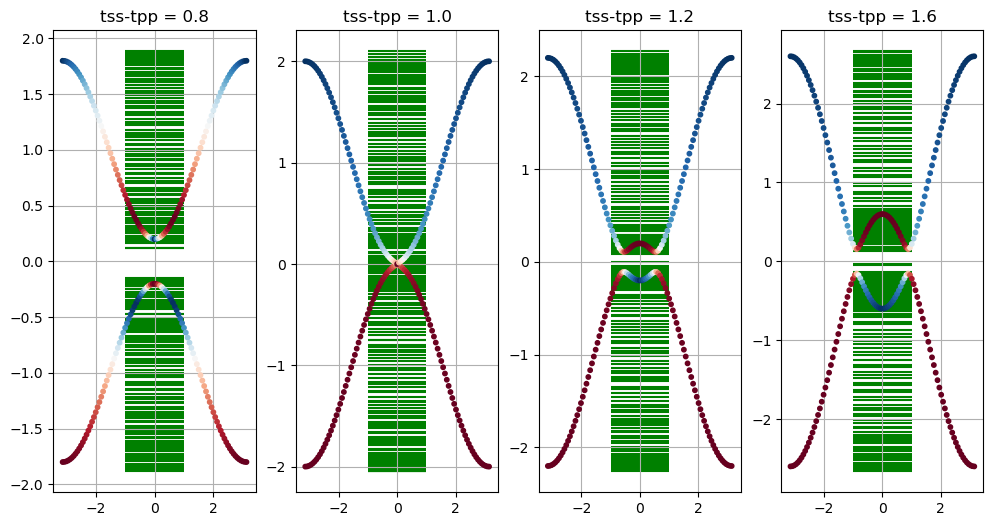

In [19]:
kpt = np.linspace(-1,1,101)*np.pi

hv = np.array([h_2state_sp(k, [-1,1,0.4,-0.4,0.1] ) for k in kpt])

Super = []

fig,axs=PLT.subplots(ncols=4,figsize=(12,6))

params=np.array([-1,1,0.4,-0.4,0.1])
for jj,taa in enumerate([0.4,0.5,0.6,0.8]):
    p = params.copy()
    p[2] = taa
    p[3] = -taa
    ax=axs[jj]
    ax.grid(True)

    hv = np.array([h_2state_sp(k, p ) for k in kpt])

    EigenVecs = np.array([np.linalg.eigh(HMatrix(hv[i]))[1] for i in range(len(hv))])

    upperS = np.abs(EigenVecs[:,1,1])
    lowerS = np.abs(EigenVecs[:,1,0])

    upperP = np.abs(EigenVecs[:,0,1])
    lowerP = np.abs(EigenVecs[:,0,0])
    
    ax.scatter(kpt, -vecmag_abs(hv), c = lowerS, cmap='RdBu_r', s=10, zorder=10)
    ax.scatter(kpt,  vecmag_abs(hv), c = upperS, cmap='RdBu_r', s=10, zorder=10)
    
    H = Hsupercell(100,p)
    P = np.diag(np.random.uniform(-0.2,0.2,size=H.shape[0]))
    E,V = np.linalg.eigh(H + P) 
    Super += [(E,V,p)]
    
    ax.hlines(E,-1,1, color='g',zorder=1)

    ax.set_title('tss-tpp = {:.1f}'.format(p[2]-p[3]))


array([-0.04184829, -0.02884627,  0.13384425])

Text(0, 0.5, 'Energy')

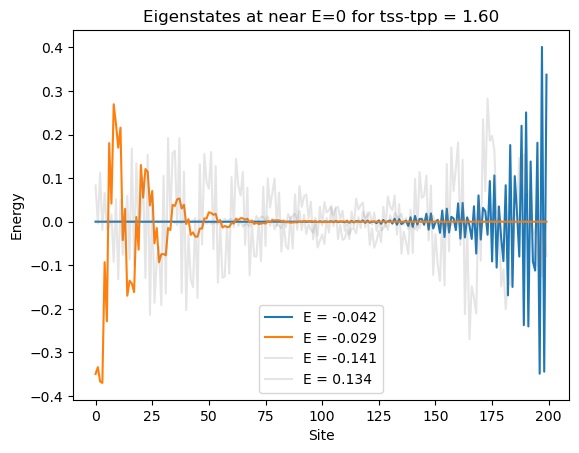

In [30]:
E,V,p = Super[-1]

midgap = np.argmin(np.abs(E))
display(E[midgap-1:midgap+2])
fig,ax=PLT.subplots()
for i in [midgap-1,midgap]:
    ax.plot(V[:,i],label='E = {:.3f}'.format(E[i]))
for i in [midgap-2,midgap+1]:
    ax.plot(V[:,i],label='E = {:.3f}'.format(E[i]),alpha=0.2,color='gray')
ax.legend()
ax.set_title('Eigenstates at near E=0 for tss-tpp = {:.2f}'.format(p[2]-p[3]))
ax.set_xlabel('Site')
ax.set_ylabel('Energy')